In [1]:
import glob
from itertools import chain

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

In [2]:
def read_metrics(path):
    eventfiles = sorted(glob.glob(path+'events.out.tfevents.*'))
    loss_steps = []
    loss = []
    perplexity_steps = []
    perplexity = []

    try:
        for this_file in eventfiles:    
            for e in tf.train.summary_iterator(this_file):
                for v in e.summary.value:
                    if v.tag == 'loss':
                        loss_steps = np.append(loss_steps,e.step)
                        loss = np.append(loss,v.simple_value)
                    elif v.tag == 'metrics/perplexity':
                        perplexity_steps = np.append(perplexity_steps,e.step)
                        perplexity = np.append(perplexity,v.simple_value)
    except:
        pass
    return loss_steps, loss, perplexity_steps, perplexity

In [3]:
train_datapath = 'results/melody_rnn/logdir/basic/train/'
eval_datapath = 'results/melody_rnn/logdir/basic/eval/'

train_loss_steps, train_loss, train_perplexity_steps, train_perplexity = read_metrics(train_datapath)
eval_loss_steps, eval_loss, eval_perplexity_steps, eval_perplexity = read_metrics(eval_datapath)

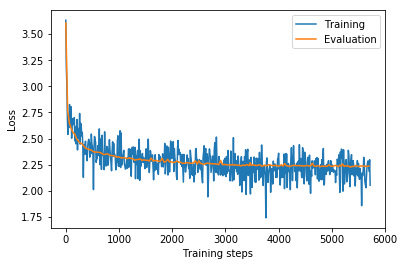

In [4]:
plt.plot(train_loss_steps,train_loss,label='Training')
plt.plot(eval_loss_steps,eval_loss,label='Evaluation')
plt.xlabel('Training steps')
plt.ylabel('Loss')
plt.legend()

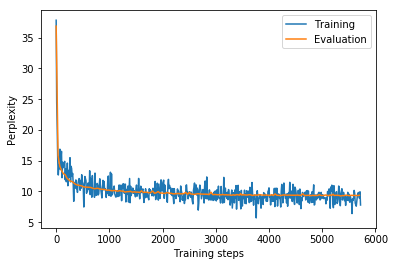

In [5]:
plt.plot(train_perplexity_steps,train_perplexity,label='Training')
plt.plot(eval_perplexity_steps,eval_perplexity,label='Evaluation')
plt.xlabel('Training steps')
plt.ylabel('Perplexity')
plt.legend()

In [6]:
latest_checkpoint =  tf.train.latest_checkpoint(train_datapath)

tf.reset_default_graph()

sess=tf.Session() 
saver = tf.train.import_meta_graph(latest_checkpoint+'.meta')
saver.restore(sess,latest_checkpoint)

with sess.as_default():
    tf.train.start_queue_runners()
    outputs=sess.graph.get_collection('outputs')[0].eval()

INFO:tensorflow:Restoring parameters from /Users/nalinisingh/dev/9.520-NoteRNN-Regularization/results/melody_rnn/logdir/basic/train/model.ckpt-5732
